In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./RTA Dataset.csv')
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
df.isnull().sum().sort_values(ascending=False)

Defect_of_vehicle              4427
Service_year_of_vehicle        3928
Work_of_casuality              3198
Fitness_of_casuality           2635
Type_of_vehicle                 950
Types_of_Junction               887
Driving_experience              829
Educational_level               741
Vehicle_driver_relation         579
Owner_of_vehicle                482
Lanes_or_Medians                385
Vehicle_movement                308
Area_accident_occured           239
Road_surface_type               172
Type_of_collision               155
Road_allignment                 142
Casualty_class                    0
Pedestrian_movement               0
Cause_of_accident                 0
Casualty_severity                 0
Age_band_of_casualty              0
Sex_of_casualty                   0
Time                              0
Road_surface_conditions           0
Number_of_casualties              0
Number_of_vehicles_involved       0
Weather_conditions                0
Light_conditions            

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<Axes: xlabel='Accident_severity'>

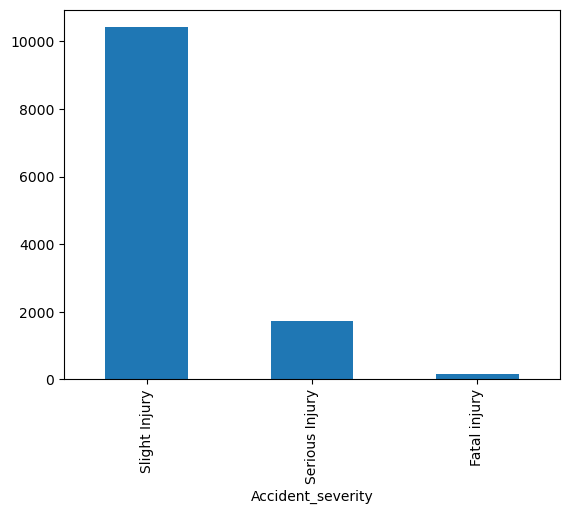

In [6]:
# Target variable classes count and bar plot
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64


<Axes: xlabel='Educational_level'>

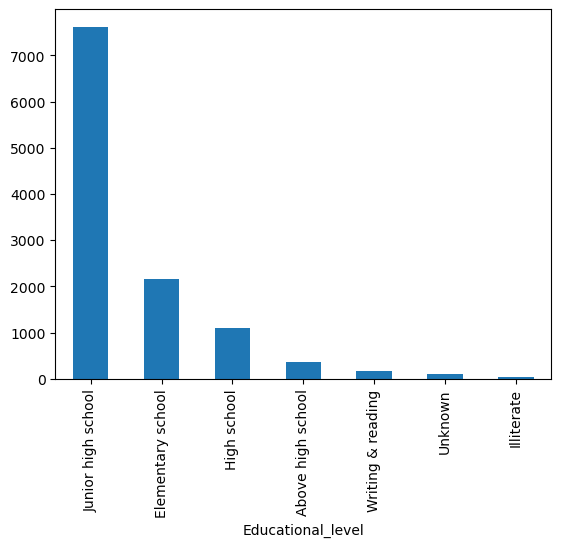

In [7]:
# Educational levels of drivers
print(df['Educational_level'].value_counts())
df['Educational_level'].value_counts().plot(kind='bar')


In [8]:
# Visualizing datase using dabl library 
import dabl

Target looks like classification
Showing only top 10 of 32 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_severity'>,
 None,
 array([[<Axes: title={'center': 'Number_of_vehicles_involved'}>,
         <Axes: title={'center': 'Number_of_casualties'}>,
         <Axes: title={'center': 'Types_of_Junction'}>,
         <Axes: title={'center': 'Age_band_of_driver'}>,
         <Axes: title={'center': 'Weather_conditions'}>],
        [<Axes: title={'center': 'Type_of_vehicle'}>,
         <Axes: title={'center': 'Area_accident_occured'}>,
         <Axes: title={'center': 'Cause_of_accident'}>,
         <Axes: title={'center': 'Day_of_week'}>,
         <Axes: title={'center': 'Light_conditions'}>]], dtype=object)]

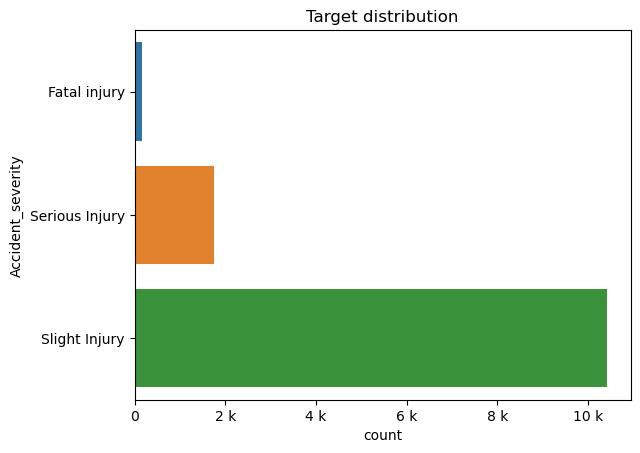

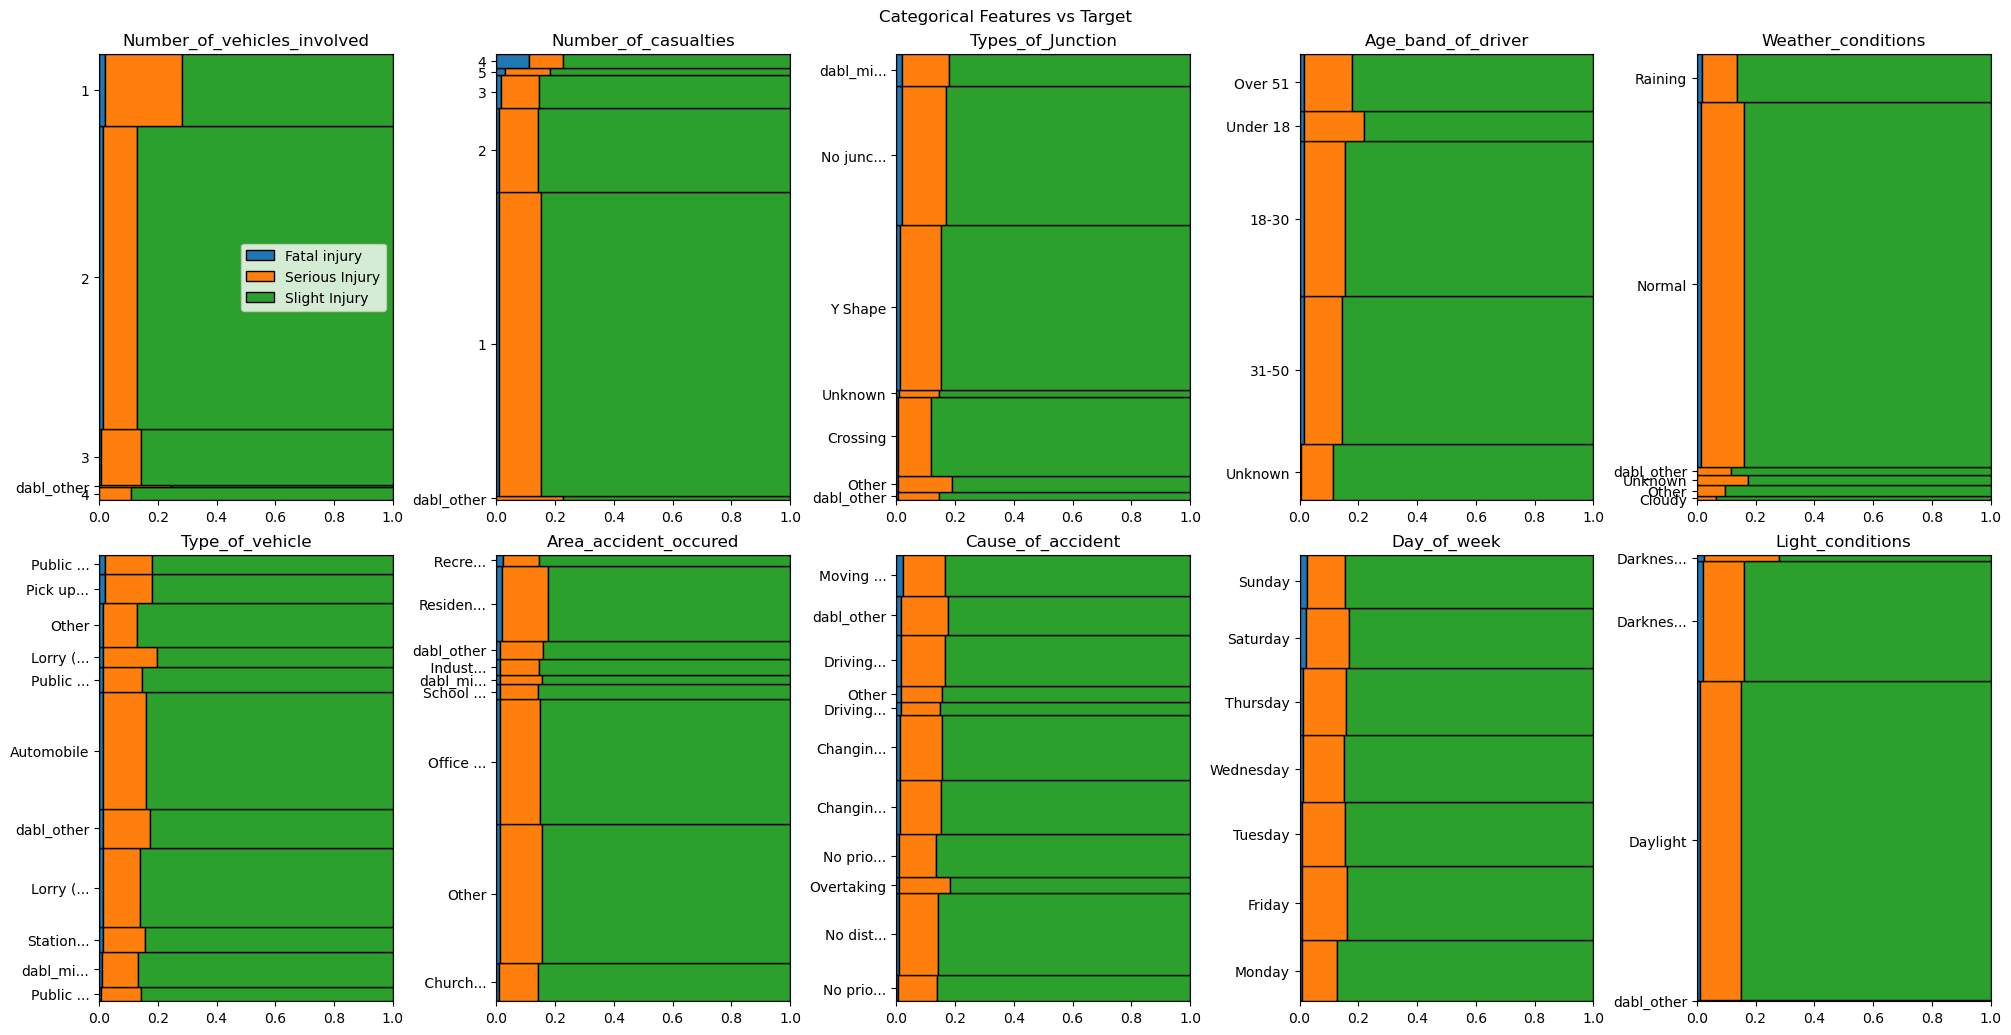

In [9]:
dabl.plot(df, target_col='Accident_severity')


# Summary from the above visualization
we can visualize the relationships between input features and a target variable. From our analysis so far, we can derive the following insights:

-  The more the number of casualties, the higher the chances of fatal injuries at the accident site
-  The more the vehicles involved in the accident, the higher the chances of serious injury
-  Light_conditions being darkness can cause more serious injury
-  Data is highly imbalanced
-  Features like area_accident_occured, cause_of_accident, day_of_week, type_of_junction seem to be essential features causing fatal injuries
  
-  Road_surface and road conditions do not affect fatal or serious accidents apparently



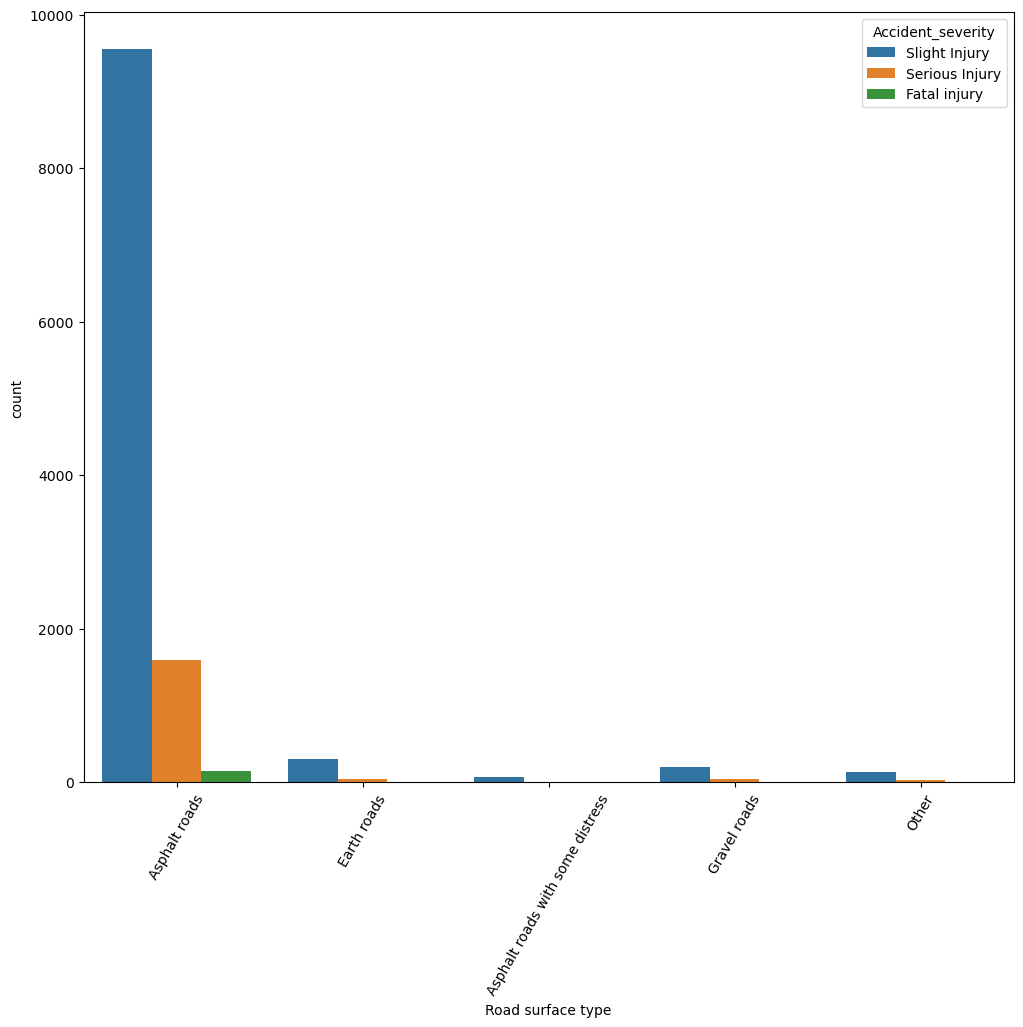

In [10]:
# Plot the bar plot of road_surface_type and accident severity feature
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='Road_surface_type', hue='Accident_severity')
plt.xlabel('Road surface type')
plt.xticks(rotation=60)
plt.show()

In [11]:
# Convert object type column into datetime datatype column
df['Time'] = pd.to_datetime(df['Time'])

# Extract the Hour_of_day from Time column
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


# Feature selection
#### Based on the insights derived from the EDA in the visualisation, we'll narrow down the number of features in the dataset.atures)

In [12]:
# feature selection based on visualization
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']
len(features)

17

In [13]:
# Generating new DataFrame
featureset_df = n_df[features]
target = n_df['Accident_severity']
featureset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12077 non-null  object
 4   Types_of_Junction            11429 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            11575 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Type_of_vehicle              11366 non-null  object
 10  Driving_experience           11487 non-null  object
 11  Service_year_of_vehicle      8388 non-null   object
 12  Type_of_collision            12161 non-null  object
 13  Sex_of_casualty              12

In [14]:
featureset_df.isnull().sum()

Day_of_week                       0
Number_of_vehicles_involved       0
Number_of_casualties              0
Area_accident_occured           239
Types_of_Junction               887
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Type_of_vehicle                 950
Driving_experience              829
Service_year_of_vehicle        3928
Type_of_collision               155
Sex_of_casualty                   0
Age_band_of_casualty              0
Cause_of_accident                 0
Hour_of_Day                       0
dtype: int64

In [15]:
feature_df = featureset_df.copy()

# NaN are missing because service info might not be available, we will fill as 'Unknown'
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')

# features information
feature_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12316 non-null  object
 4   Types_of_Junction            12316 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            12316 non-null  object
 8   Vehicle_driver_relation      12316 non-null  object
 9   Type_of_vehicle              12316 non-null  object
 10  Driving_experience           12316 non-null  object
 11  Service_year_of_vehicle      12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Sex_of_casualty              12

In [16]:
# Setting input features X and target features Y
X = feature_df[features] # here features are selected from 'object' datatype
y = n_df['Accident_severity']

# We will use the panda get_dummies method for hot-encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.head()

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_Day,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Area_accident_occured_ Recreational areas,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,17,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2,17,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2,2,17,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2,2,1,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,2,1,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [17]:
# We’ll also be encoding the target column using Scikit-learn’s LabelEncoder().
# import labelencoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)

print('Encoded labels: ', lb.classes_)
y_en = pd.Series(y_encoded)
y_en.shape

Encoded labels:  ['Fatal injury' 'Serious Injury' 'Slight Injury']


(12316,)

In [18]:
# Feature selection method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=50)

X_new = fs.fit_transform(encoded_df, y_en)

# Take the selected features
cols = fs.get_feature_names_out()

# convert selected features into DataFrame
fs_df = pd.DataFrame(X_new, columns=cols)
fs_df.head()

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_Day,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Area_accident_occured_ Recreational areas,Area_accident_occured_ Hospital areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Recreational areas,...,Cause_of_accident_Driving to the left,Cause_of_accident_Improper parking,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Turnover
0,2,2,17,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,2,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,2,17,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Summary of the above Evaluation
 We are selecting the top 50 features out of 106 features from the encoded dataframe and storing them in a new dataframe object called fs_df. The “Chi2” statistic is used when the target feature is a categorical variable, and the “Pearson’s coefficient” is used when the target feature is a continuous variable.

# Imbalanced Dataset Treatment Using SMOTENC Technique
The Scikit-learn library has an extension library called “Imbalanced-learn” which has various methods to handle imbalanced data.

To upsample minority class samples, we will use the “Synthetic Minority Over-sampling Technique for Nominal and Continuous” (SMOTENC) techniques in our project. This method is designed for categorical and continuous features to accurately upsample the dataset.

In [19]:
# Importing the SMOTENC fromobject from imblearn library
from imblearn.over_sampling import SMOTENC

In [20]:
import numpy as np

# importing the SMOTENC object from imblearn library 
from imblearn.over_sampling import SMOTENC

# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(1,50))
categorical_features = [0, 1, 2]  # Update with actual indices of categorical features

# creating smote object with SMOTENC class
smote = SMOTENC(categorical_features=categorical_features, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y_en)

# print the shape of new upsampled dataset
X_n.shape, y_n.shape

((31245, 50), (31245,))

In [21]:
# Print the target classes distribution
print(y_n.value_counts())

2    10415
1    10415
0    10415
Name: count, dtype: int64


In [22]:
y_n

0        2
1        2
2        1
3        2
4        2
        ..
31240    1
31241    1
31242    1
31243    1
31244    1
Length: 31245, dtype: int32

# Building a Classification Model

Develop a classification machine learning model using the random forest machine learning algorithm.
##### We will import the Scikit-learn library’s various classes to develop an ML model and evaluate it

In [23]:
# Import the necessary library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Train and test split and building baseline model to predict target features.
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# Modelling using Random forest baseline

rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)

# Predicting on test data
predics = rf.predict(X_tst)

# Train score
rf.score(X_trn, y_trn)

0.9212674027844455

In [24]:
# Classification report on test dataset
classif_re = classification_report(y_tst, predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2085
           1       0.75      0.84      0.79      2100
           2       0.85      0.72      0.78      2064

    accuracy                           0.84      6249
   macro avg       0.84      0.83      0.83      6249
weighted avg       0.84      0.84      0.83      6249



In [25]:
# f1_score of the model
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

0.8343129027239446


# Deployment Stage of the Data app with Streamlit

In [26]:
# Selecting 7 categorical features from the DataFrame
import joblib
from sklearn.preprocessing import OrdinalEncoder

new_fea_df = feature_df[['Type_of_collision','Age_band_of_driver','Sex_of_driver',
       'Educational_level','Service_year_of_vehicle','Day_of_week','Area_accident_occured']]

oencoder2 = OrdinalEncoder()
encoded_df3 = pd.DataFrame(oencoder2.fit_transform(new_fea_df))
encoded_df3.columns = new_fea_df.columns

# Save the ordinal encoder object for inference pipeline
joblib.dump(oencoder2, "ordinal_encoder2.joblib")

['ordinal_encoder2.joblib']

In [27]:
# Now, we will combine 7 categorical features with the 3 numerical features to train the final model for inference.
# final dataframe to be trained for model inference
s_final_df = pd.concat([feature_df[['Number_of_vehicles_involved','Number_of_casualties','Hour_of_Day']],encoded_df3], axis=1)

# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)

# save the model object
joblib.dump(rf, "rta_model_deploy3.joblib", compress=9)

['rta_model_deploy3.joblib']